#### 7PAM2002-0901-2024 - MSc Data Science Project

Topic - Comparing Data Augmentation Methods – Easy Data Augmentation and Back Translation for text(Intentation) Classification using LSTM.

Research Question - Which data augmentation methods applied on a small dataset outperform models trained without augmentation in terms of accuracy and precision in case of intention(text) classification using LSTM as training models, and by how much do they improve performance?

Supervisor - Dr. Man Lai Tang

Done by - Mohit Agarwal (22031257)

### Importing Packages

In [1]:
# importing required packages...
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [2]:
# appending the location for augment modules
import sys
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument")
# appending the location for modles modules
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Models")

In [3]:
# importing modules from local drives...
import preprocess_eda as preprocess
import lstm
import train_lstm
import back_translation
import eda

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# setiing plot style
plt.style.use("seaborn-v0_8-darkgrid")

#### Defining Paths

In [5]:
# path for lstm model with tuned hyperparameter
hp_path = r"D:\MScDataScience\7.Data_Science_Project\Model_Callbacks"
# path for under & overfitting graphs
valuation_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Overfitting_Underfitting"

### Exploratory Data Analysis

The length of the training data:  7500
The length of the testing data:  4500
The length of the validation data:  3000


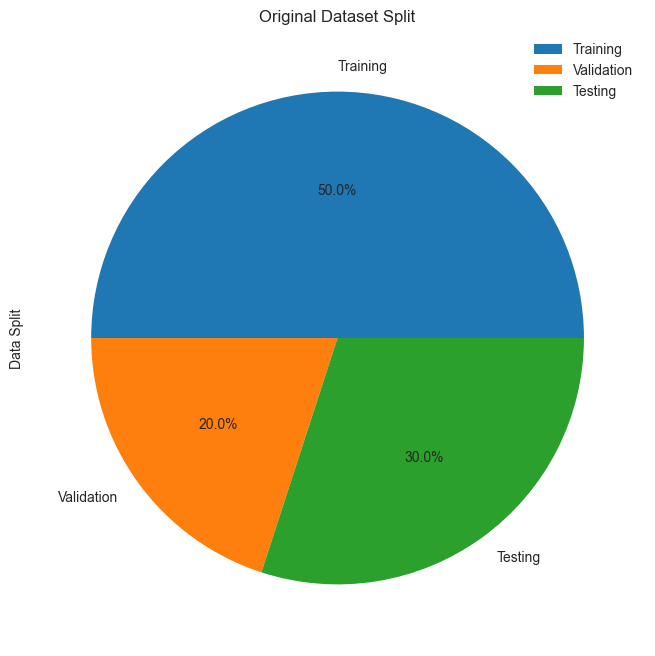

In [6]:
preprocess.records_per_set(train=preprocess.train_df,
                           val=preprocess.val_df,
                           test=preprocess.test_df,
                           title="Original Dataset Split")

##### Training Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  3
[INFO] Maximum Number of Charaters in a query is:  136


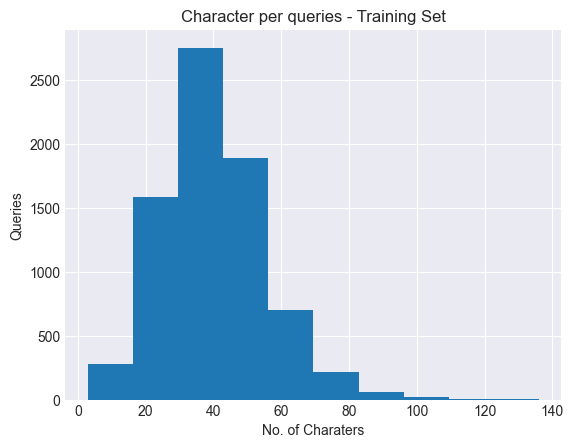

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  28


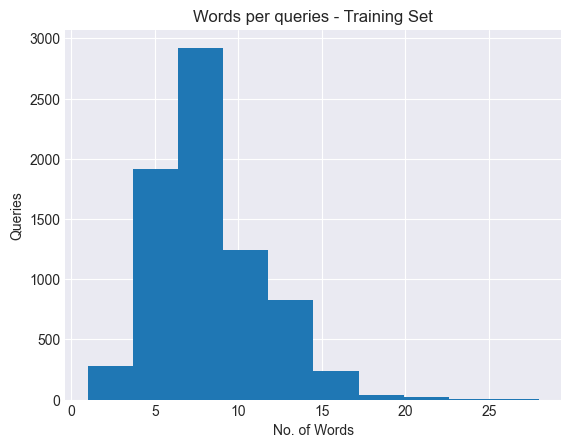

[INFO] Minimum Number of Average Words Length in a query is:  1.8
[INFO] Maximum Number of Average Words Length in a query is:  11.0


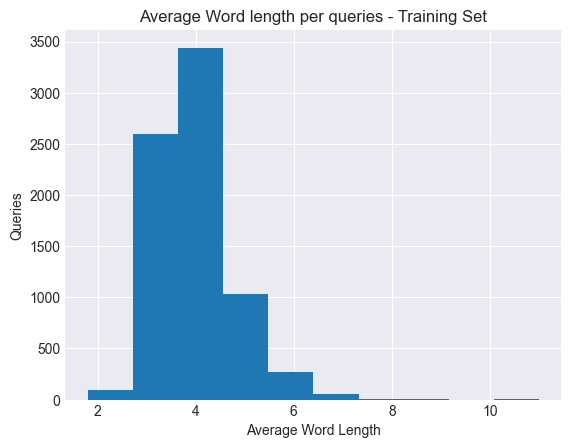


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4164


In [7]:
# exploring the training data
train_explore = preprocess.eda(data=preprocess.train_df,
                               path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Training")
# plotting number of character per record
train_explore.char_per_query(title="Training Set")
# plotting number of words per record
train_explore.word_per_query(title="Training Set")
# plotting average word length per record
train_explore.avg_word_len_per_query(title="Training Set")
# line graph of word frequency per class
train_word_freq_dict = train_explore.word_freq_per_class(title="Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict = train_explore.word_cloud_per_class(
    title="Training Set")
# number of unique words
train_num_unique_words = train_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words)

The length of the queries is the tarining set is not long. Most queries has in 5 to 10 words, highest beign 25.

##### Validation Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  114


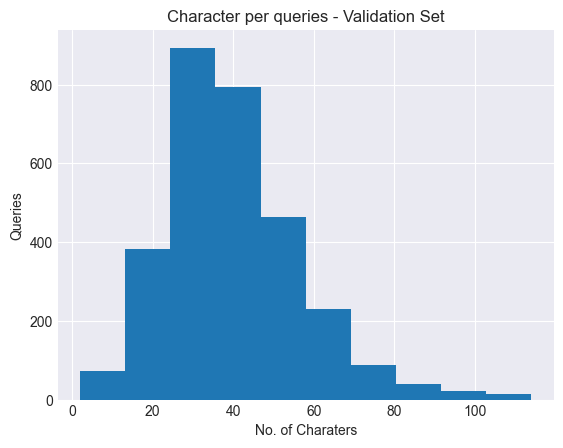

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  24


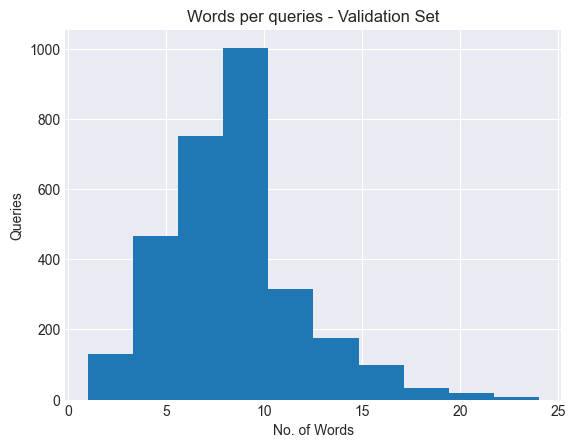

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


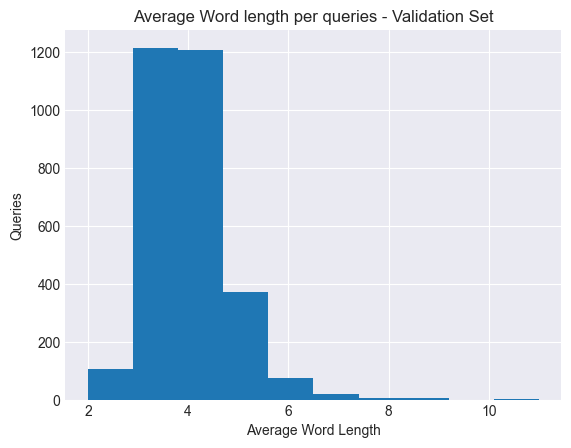


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  2500


In [8]:
# exploring the validation data
val_explore = preprocess.eda(data=preprocess.val_df,
                             path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Validation")
# plotting number of character per record
val_explore.char_per_query(title="Validation Set")
# plotting number of words per record
val_explore.word_per_query(title="Validation Set")
# plotting average word length per record
val_explore.avg_word_len_per_query(title="Validation Set")
# line graph of word frequency per class
val_word_freq_dict = val_explore.word_freq_per_class(title="Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict = val_explore.word_cloud_per_class(
    title="Validation Set")
# number of unique words
val_num_unique_words = val_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words)

The average word

##### Testing Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  125


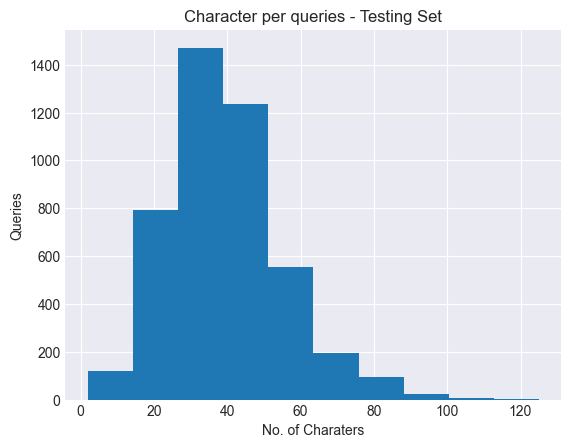

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  25


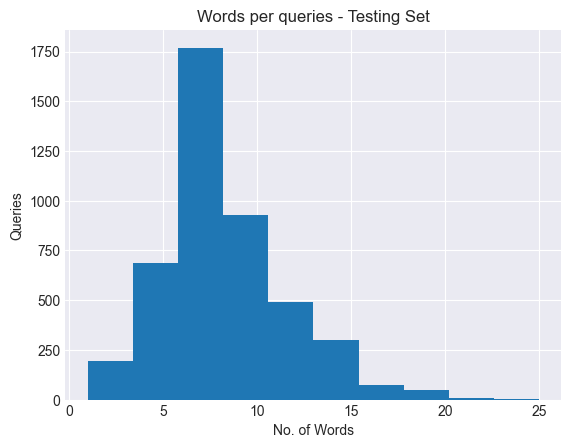

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


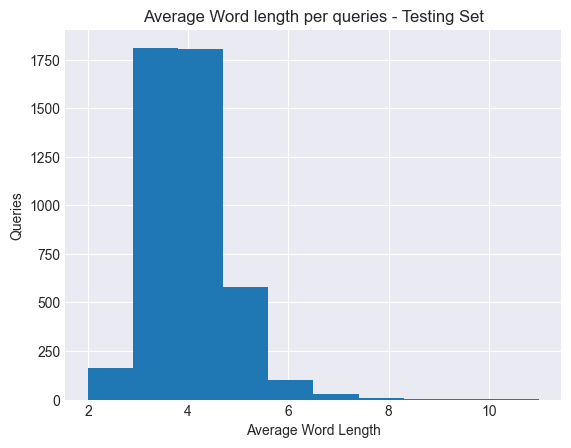


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  2998


In [9]:
# exploring the testing data
test_explore = preprocess.eda(data=preprocess.test_df,
                              path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Testing")
# plotting number of character per record
test_explore.char_per_query(title="Testing Set")
# plotting number of words per record
test_explore.word_per_query(title="Testing Set")
# plotting average word length per record
test_explore.avg_word_len_per_query(title="Testing Set")
# line graph of word frequency per class
test_word_freq_dict = test_explore.word_freq_per_class(title="Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict = test_explore.word_cloud_per_class(title="Testing Set")
# number of unique words
test_num_unique_words = test_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words)

### Preprocessing the Data

In [10]:
# preprocessing the training set
train_preprocess = preprocess.pre_process(preprocess.train_df)
x_train = train_preprocess.preprocess()
# lemmentizing the preprocessed data
x_train = train_preprocess.lemmatise()

# encoding the classes to one-hot format
y_train = train_preprocess.encode_class()

In [11]:
# preprocessing the validation set
val_preprocess = preprocess.pre_process(preprocess.val_df)
x_val = val_preprocess.preprocess()
# lemmentizing the preprocessed data
x_val = val_preprocess.lemmatise()

# encoding the classes to one-hot format
y_val = val_preprocess.encode_class()

In [12]:
# preprocessing the testing set
test_preprocess = preprocess.pre_process(preprocess.test_df)
x_test = test_preprocess.preprocess()
# lemmentizing the preprocessed data
x_test = test_preprocess.lemmatise()

# encoding the classes to one-hot format
y_test = test_preprocess.encode_class()

### Exploring the Processed Datasets

Training Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  87


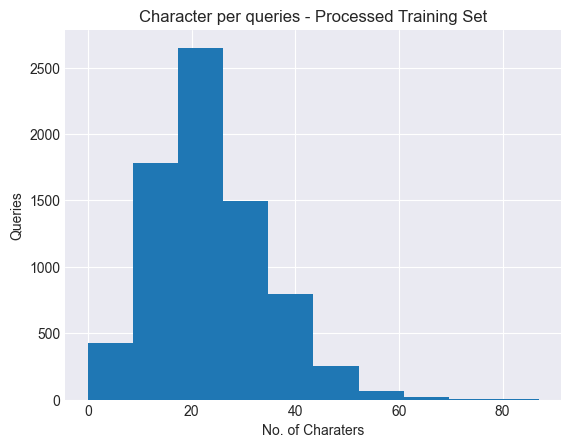

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  13


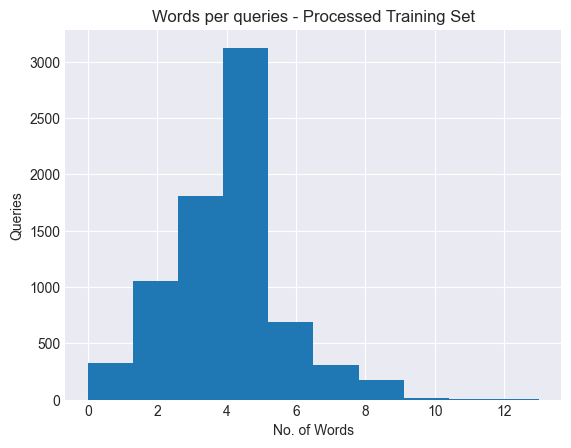

[INFO] Minimum Number of Average Words Length in a query is:  1.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Maximum Number of Average Words Length in a query is:  13.0


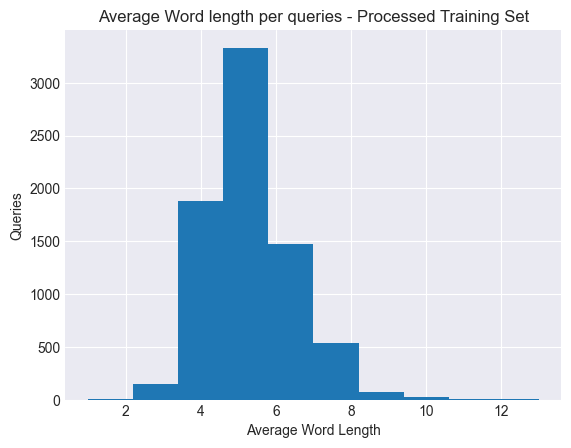


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3169


In [13]:
# creating processed training dataframe
processed_train_df = pd.DataFrame(({"Query": x_train,
                                    "Intent": preprocess.train_df.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore = preprocess.eda(data=processed_train_df,
                                         path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Processed\Training")
# plotting number of character per record
processed_train_explore.char_per_query(title="Processed Training Set")
# plotting number of words per record
processed_train_explore.word_per_query(title="Processed Training Set")
# plotting average word length per record
processed_train_explore.avg_word_len_per_query(title="Processed Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict = processed_train_explore.word_freq_per_class(
    title="Processed Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict = processed_train_explore.word_cloud_per_class(
    title="Processed Training Set")
# number of unique words
processed_train_num_unique_words = processed_train_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words)

Validation Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  85


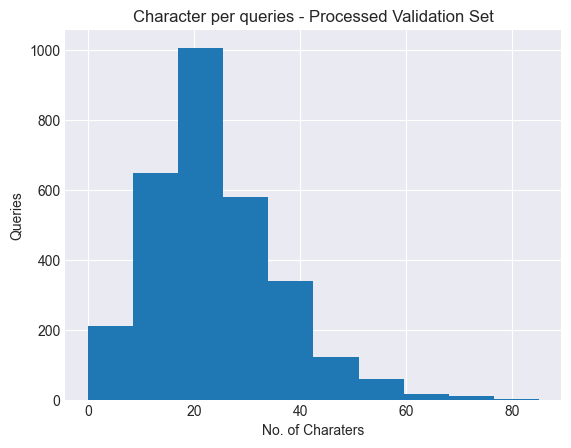

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  14


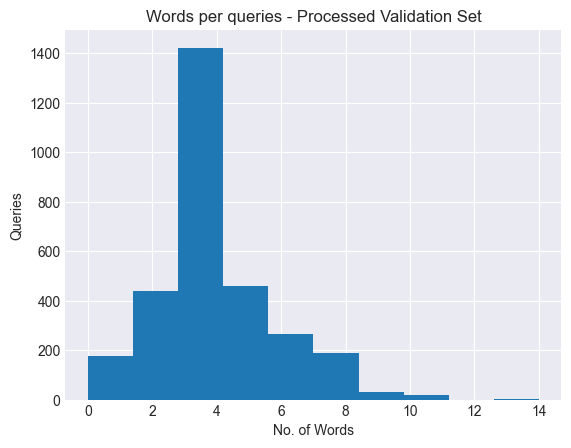

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  12.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


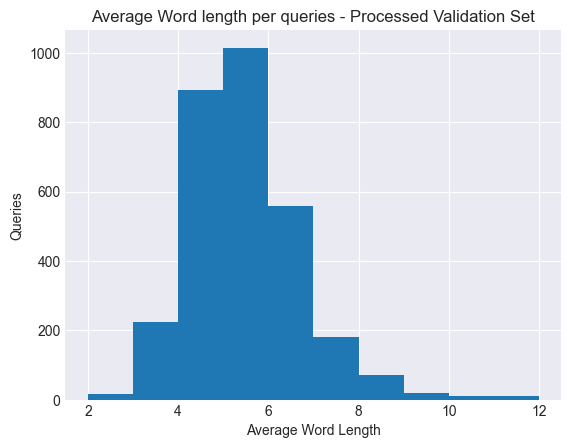


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  1981


In [14]:
# creating processed validation dataframe
processed_val_df = pd.DataFrame(({"Query": x_val,
                                  "Intent": preprocess.val_df.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore = preprocess.eda(data=processed_val_df,
                                       path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Processed\Validation")
# plotting number of character per record
processed_val_explore.char_per_query(title="Processed Validation Set")
# plotting number of words per record
processed_val_explore.word_per_query(title="Processed Validation Set")
# plotting average word length per record
processed_val_explore.avg_word_len_per_query(title="Processed Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict = processed_val_explore.word_freq_per_class(
    title="Processed Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict = processed_val_explore.word_cloud_per_class(
    title="Processed Validation Set")
# number of unique words
processed_val_num_unique_words = processed_val_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words)

Testing Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  86


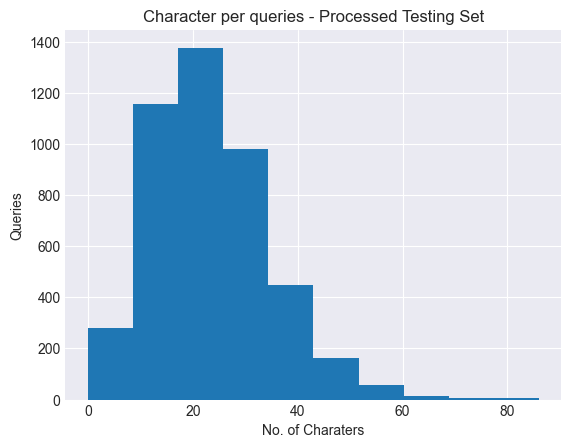

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  13


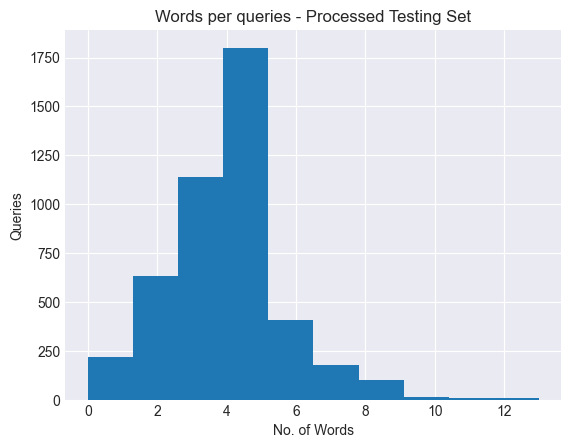

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


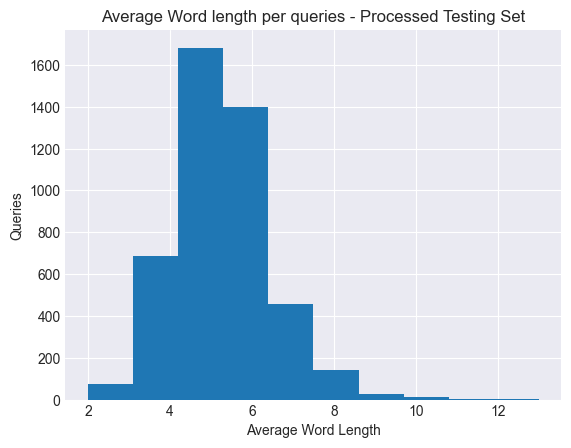


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  2322


In [15]:
# creating processed testing dataframe
processed_test_df = pd.DataFrame(({"Query": x_test,
                                   "Intent": preprocess.test_df.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore = preprocess.eda(data=processed_test_df,
                                        path=r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Processed\Testing")
# plotting number of character per record
processed_test_explore.char_per_query(title="Processed Testing Set")
# plotting number of words per record
processed_test_explore.word_per_query(title="Processed Testing Set")
# plotting average word length per record
processed_test_explore.avg_word_len_per_query(title="Processed Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict = processed_test_explore.word_freq_per_class(
    title="Processed Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict = processed_test_explore.word_cloud_per_class(
    title="Processed Testing Set")
# number of unique words
processed_test_num_unique_words = processed_test_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words)

### Creating a textvectorization layer using Keras

In [16]:
# setting vocabulary size
VOCAB_SIZE = 50000
# setting the oputput sequence length for textvector layer
SEQ_LEN = 25
# creating a keras text vector layer
textvector_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                     ngrams=(1, 2, 3),
                                                     output_mode="int",
                                                     output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer.adapt(x_train)

### Hypermodel Building and Optimizing using Bayesian Optimizer

##### Single LSTM

In [19]:
# building single lstm hypermodela and optimizing
single_lstm_tuner = lstm.fine_tune(x_train=x_train,
                                   x_val=x_val,
                                   y_train=y_train,
                                   y_val=y_val,
                                   num_class=preprocess.num_intent,
                                   textvector_layer=textvector_layer,
                                   vocab_size=VOCAB_SIZE,
                                   model_name="single_lstm",
                                   tuner_name="bayesian")

Trial 15 Complete [00h 03m 45s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.1850983202457428
Total elapsed time: 01h 52m 52s
Results summary
Results in D:\MScDataScience\7.Data_Science_Project\HPO\Bayesian\single_lstm_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 11 summary
Hyperparameters:
embedding_seq_length: 70
lstm_units: 170
rate: 0.275
activation: elu
learning_rate: 0.0038393475795542604
optimizer: RMSprop
shuffle: False
batch_size: 96
Score: 0.1850983202457428

Trial 00 summary
Hyperparameters:
embedding_seq_length: 130
lstm_units: 25
rate: 0.6000000000000001
activation: elu
learning_rate: 0.011436269370386772
optimizer: Nadam
shuffle: True
batch_size: 16
Score: 0.046005000127479434

Trial 04 summary
Hyperparameters:
embedding_seq_length: 130
lstm_units: 35
rate: 0.675
activation: elu
learning_rate: 0.01982367798884509
optimizer: Nadam
shuffle: True
batch_size: 96
Score: 0.03806000296026468

Trial 01 summary
Hyperparameters:
embedding_se

##### Stacked LSTM

In [20]:
# building stacked lstm hypermodela and optimizing
stacked_lstm_tuner = lstm.fine_tune(x_train=x_train,
                                    x_val=x_val,
                                    y_train=y_train,
                                    y_val=y_val,
                                    num_class=preprocess.num_intent,
                                    textvector_layer=textvector_layer,
                                    vocab_size=VOCAB_SIZE,
                                    model_name="stacked_lstm",
                                    tuner_name="bayesian")

Trial 15 Complete [00h 25m 19s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.986811637878418
Total elapsed time: 03h 37m 52s
Results summary
Results in D:\MScDataScience\7.Data_Science_Project\HPO\Bayesian\stacked_lstm_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
embedding_seq_length: 10
lstm_units1: 80
lstm_units2: 165
rate1: 0.5
rate2: 0.5
activation: elu
learning_rate: 0.00489866406915217
optimizer: Nadam
shuffle: True
batch_size: 48
Score: 0.986811637878418

Trial 04 summary
Hyperparameters:
embedding_seq_length: 20
lstm_units1: 135
lstm_units2: 60
rate1: 0.5
rate2: 0.5
activation: elu
learning_rate: 0.0016735296914333478
optimizer: Nadam
shuffle: True
batch_size: 16
Score: 0.34326835721731186

Trial 00 summary
Hyperparameters:
embedding_seq_length: 60
lstm_units1: 165
lstm_units2: 140
rate1: 0.225
rate2: 0.45
activation: tanh
learning_rate: 0.0012405273217607098
optimizer: Nadam
shuffle: True
batch_size: 16
Score

##### Convo-LSTM

In [21]:
# building convo lstm hypermodela and optimizing
convo_lstm_tuner = lstm.fine_tune(x_train=x_train,
                                  x_val=x_val,
                                  y_train=y_train,
                                  y_val=y_val,
                                  num_class=preprocess.num_intent,
                                  textvector_layer=textvector_layer,
                                  vocab_size=VOCAB_SIZE,
                                  model_name="convo_lstm",
                                  tuner_name="bayesian")

Trial 15 Complete [00h 16m 43s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.9867200702428818
Total elapsed time: 02h 04m 39s
Results summary
Results in D:\MScDataScience\7.Data_Science_Project\HPO\Bayesian\convo_lstm_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 13 summary
Hyperparameters:
embedding_seq_length: 70
convo_filters: 352
kernel_size: 6
convo_rate: 0.275
convo_activation: elu
lstm_units: 135
lstm_rate: 0.2
lstm_activation: elu
learning_rate: 0.018327591765327517
optimizer: RMSprop
shuffle: False
batch_size: 240
Score: 0.9867200702428818

Trial 07 summary
Hyperparameters:
embedding_seq_length: 60
convo_filters: 224
kernel_size: 4
convo_rate: 0.625
convo_activation: relu
lstm_units: 85
lstm_rate: 0.65
lstm_activation: selu
learning_rate: 0.01296725770483565
optimizer: RMSprop
shuffle: True
batch_size: 208
Score: 0.9701783806085587

Trial 04 summary
Hyperparameters:
embedding_seq_length: 150
convo_filters: 288
kernel_size: 4
convo_rate: 

### Training the Single Layer LSTM Model with best Auto-Hyperparameter

In [24]:
# single lstm path for
single_lstm_path = os.path.join(hp_path, "Single_lstm")

##### For 30 Epochs

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.0000e+00 - f1_score: 0.0025 - loss: 5.0172 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 8.1770e-05 - val_loss: 5.0271 - val_precision: 0.0000e+00
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.0000e+00 - f1_score: 0.0027 - loss: 5.0099 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0055 - val_loss: 4.7499 - val_precision: 0.0000e+00
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.0000e+00 - f1_score: 0.0097 - loss: 4.6982 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0143 - val_loss: 4.1799 - val_precision: 0.0000e+00
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.0000e+00 - f1_score: 0.0264 - loss: 4.1511 - precision: 0.3502 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0282 - val_loss: 3.8602 - val_precision: 0.0000e+00
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.0000e+00 - f1

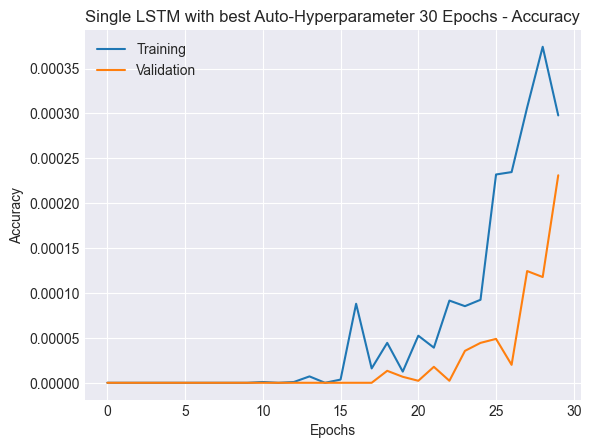

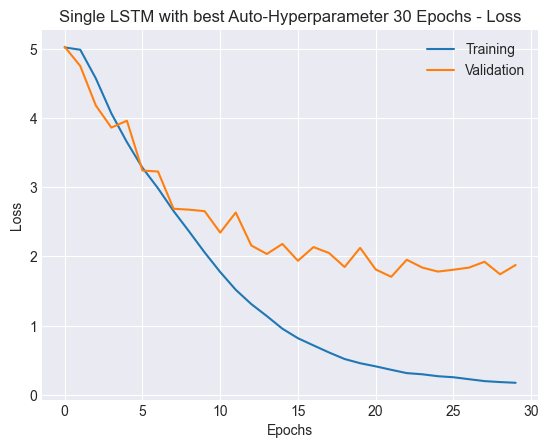

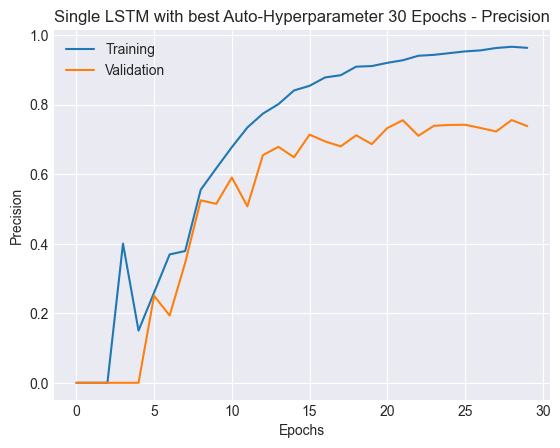

<Figure size 640x480 with 0 Axes>

In [25]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_path,
                                              model=hp_lstm_model_30,
                                              batch_size=96,
                                              epochs=30,
                                              filename="hp_96Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

In [27]:
# lstm model summary
hp_lstm_model_30.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 70)         │     3,500,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 170)            │       163,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 170)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,379,342 (28.15 MB)

 Trainable params: 3,689,670 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,689,672 (14.07 MB)

In [26]:
# evaluating the model with test dataset
hp_lstm_model_30_evaluate = hp_lstm_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 9.1723e-05 - f1_score: 0.3653 - loss: 1.8600 - precision: 0.7228


##### For 50 Epochs

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.0000e+00 - f1_score: 0.0025 - loss: 5.0165 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 6.5043e-04 - val_loss: 4.9771 - val_precision: 0.0000e+00
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 3.0075e-04 - f1_score: 0.0057 - loss: 4.9670 - precision: 0.0733 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0052 - val_loss: 4.6387 - val_precision: 0.0000e+00
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 4.7831e-05 - f1_score: 0.0164 - loss: 4.5004 - precision: 0.0112 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0211 - val_loss: 3.8398 - val_precision: 0.0000e+00
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.0000e+00 - f1_score: 0.0355 - loss: 3.9299 - precision: 0.0104 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0110 - val_loss: 4.0902 - val_precision: 0.1318
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.0000e+00 - f1_score: 0.051

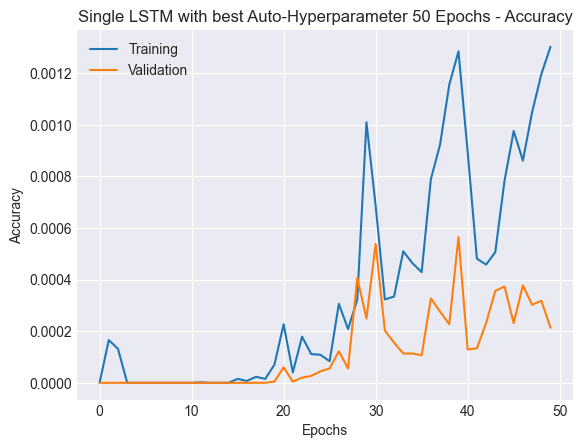

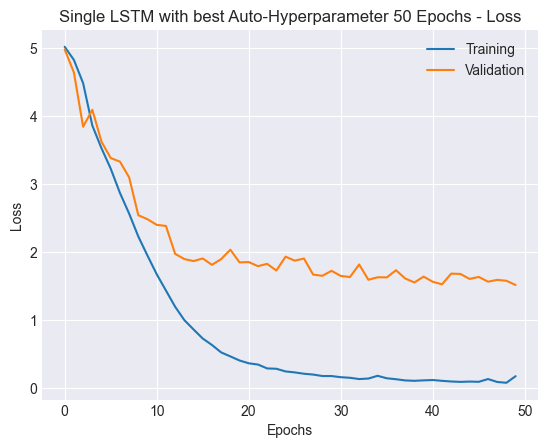

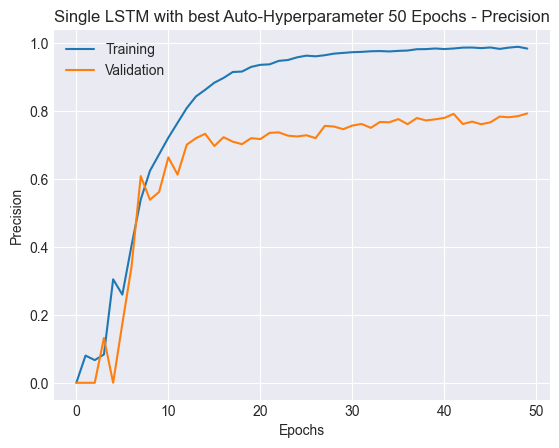

141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 6.7589e-04 - f1_score: 0.3865 - loss: 1.4529 - precision: 0.7835


<Figure size 640x480 with 0 Axes>

In [28]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_path,
                                              model=hp_lstm_model_50,
                                              batch_size=96,
                                              epochs=50,
                                              filename="hp_96Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate = hp_lstm_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 75 Epochs

Epoch 1/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.0000e+00 - f1_score: 0.0015 - loss: 5.0243 - precision: 0.0184 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0021 - val_loss: 6.8835 - val_precision: 0.0181
Epoch 2/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.0000e+00 - f1_score: 0.0055 - loss: 4.9362 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0030 - val_loss: 4.7279 - val_precision: 0.0000e+00
Epoch 3/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.0000e+00 - f1_score: 0.0146 - loss: 4.4055 - precision: 0.1619 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0173 - val_loss: 4.1581 - val_precision: 0.0000e+00
Epoch 4/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.0000e+00 - f1_score: 0.0377 - loss: 3.9000 - precision: 0.0389 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0355 - val_loss: 3.5776 - val_precision: 0.1532
Epoch 5/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.0000e+00 - f1_score: 0.0551 - lo

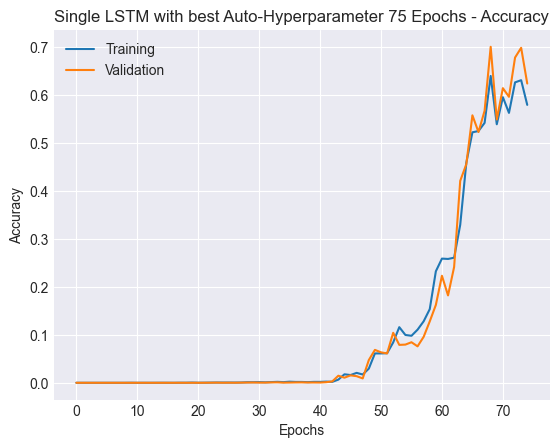

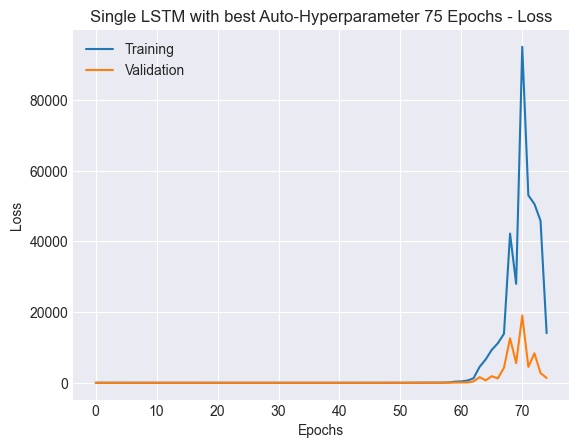

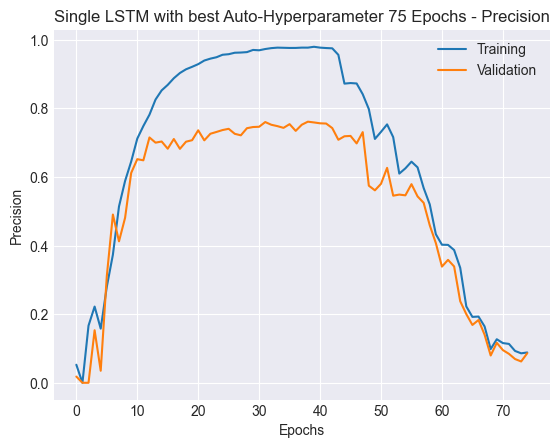

141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6469 - f1_score: 0.0461 - loss: 1346.6302 - precision: 0.0633


<Figure size 640x480 with 0 Axes>

In [29]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_75 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_path,
                                              model=hp_lstm_model_75,
                                              batch_size=96,
                                              epochs=75,
                                              filename="hp_96Batch_75epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate = hp_lstm_model_75.evaluate(
    x=x_test, y=y_test, verbose=1)

### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 9.7561e-06 - f1_score: 0.0031 - loss: 5.0461 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 8.9847e-05 - val_loss: 5.0135 - val_precision: 0.0000e+00
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.0000e+00 - f1_score: 0.0039 - loss: 5.0158 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0019 - val_loss: 5.0094 - val_precision: 0.0000e+00
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.0000e+00 - f1_score: 0.0076 - loss: 5.0091 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0047 - val_loss: 4.9977 - val_precision: 0.0000e+00
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 1.2927e-04 - f1_score: 0.0033 - loss: 4.9267 - precision: 0.1337 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0038 - val_loss: 4.6882 - val_precision: 0.0000e+00
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.0000e+00 - f1_scor

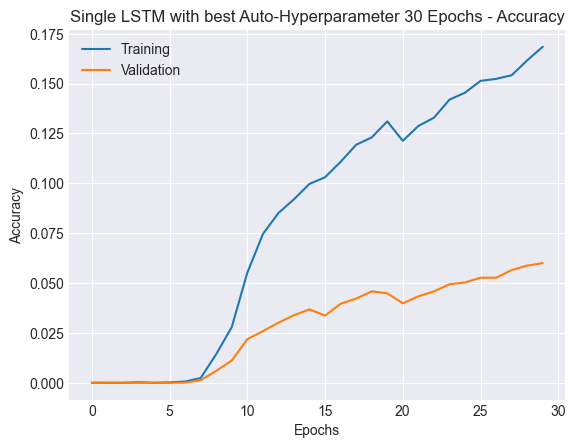

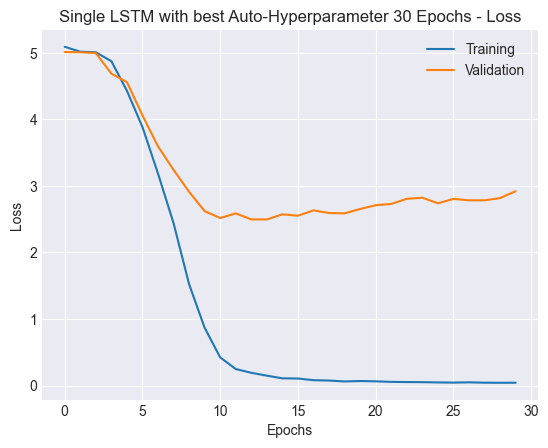

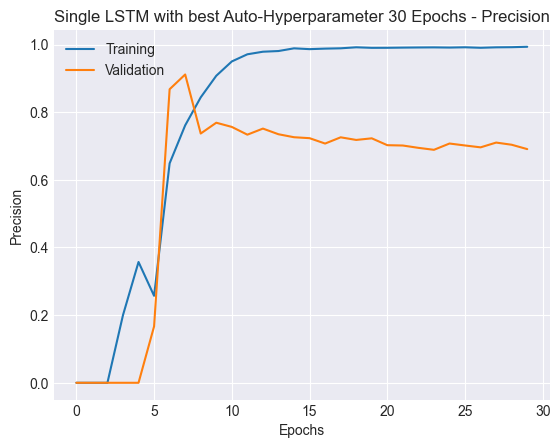

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0593 - f1_score: 0.3306 - loss: 2.8306 - precision: 0.7088


<Figure size 640x480 with 0 Axes>

In [30]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_path,
                                                  model=old_hp_lstm_model_30,
                                                  batch_size=192,
                                                  epochs=30,
                                                  filename="old_hp_192Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate = old_hp_lstm_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 50 Epochs

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 5.3011e-05 - f1_score: 0.0026 - loss: 5.0133 - precision: 0.1220 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0052 - val_loss: 4.8661 - val_precision: 0.0000e+00
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.0000e+00 - f1_score: 0.0074 - loss: 4.6490 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0292 - val_loss: 3.9600 - val_precision: 0.6000
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 5.3510e-07 - f1_score: 0.0525 - loss: 3.7764 - precision: 0.3474 - val_accuracy: 4.4444e-06 - val_f1_score: 0.1690 - val_loss: 3.1920 - val_precision: 0.9600
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 3.2081e-05 - f1_score: 0.2329 - loss: 2.6653 - precision: 0.7133 - val_accuracy: 9.1111e-05 - val_f1_score: 0.4048 - val_loss: 2.4232 - val_precision: 0.9342
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 8.2911e-05 - f1_score: 0.5401 - loss: 1.5565

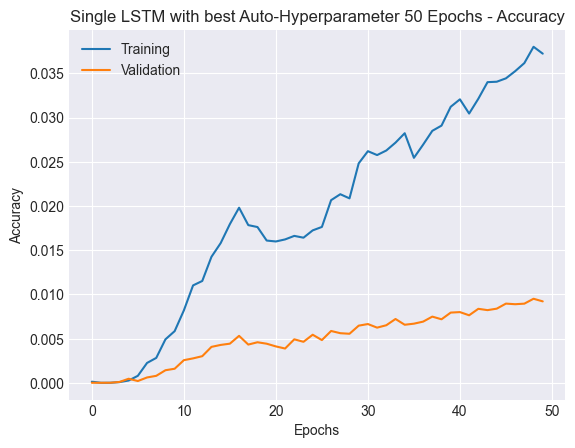

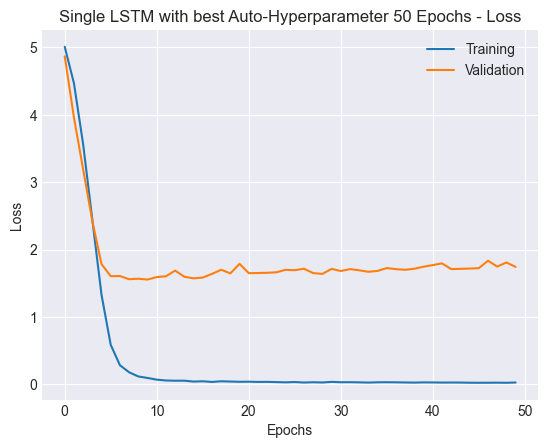

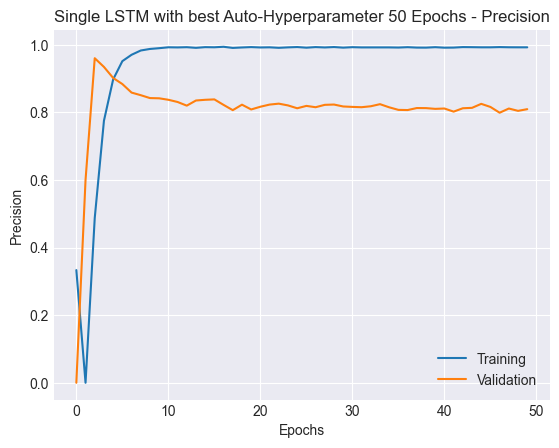

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0109 - f1_score: 0.3741 - loss: 1.7801 - precision: 0.7882


<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_path,
                                                  model=old_hp_lstm_model_50,
                                                  batch_size=192,
                                                  epochs=50,
                                                  filename="old_hp_192Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_50,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs",
                path=os.path.join(valuation_path, "Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate = old_hp_lstm_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 75 Epochs

Epoch 1/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 3.0551e-06 - f1_score: 0.0023 - loss: 5.0157 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 6.8792e-04 - val_loss: 5.0254 - val_precision: 0.0000e+00
Epoch 2/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 1.1230e-04 - f1_score: 0.0031 - loss: 5.0160 - precision: 0.0588 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0034 - val_loss: 4.7092 - val_precision: 0.0000e+00
Epoch 3/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.0000e+00 - f1_score: 0.0123 - loss: 4.5888 - precision: 0.0575 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0301 - val_loss: 4.1356 - val_precision: 1.0000
Epoch 4/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.0020 - f1_score: 0.0454 - loss: 4.1272 - precision: 0.2292 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0965 - val_loss: 3.7174 - val_precision: 0.8261
Epoch 5/75
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 4.1110e-04 - f1_score: 0.1670 - loss: 3.

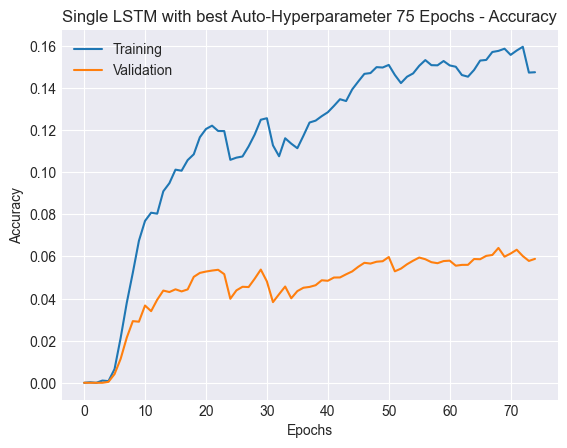

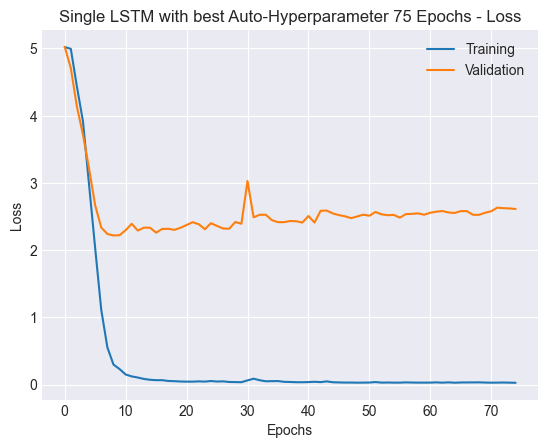

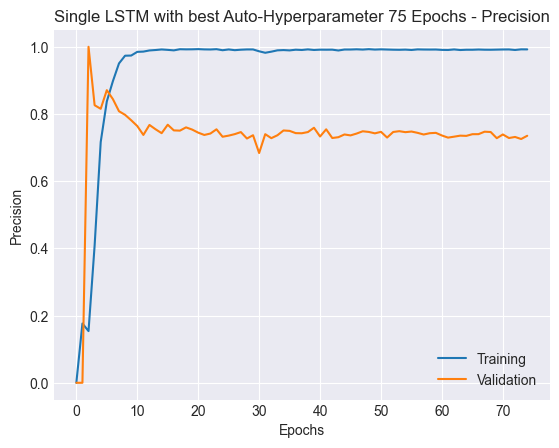

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0545 - f1_score: 0.3500 - loss: 2.7740 - precision: 0.7058


<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_path,
                                                  model=old_hp_lstm_model_75,
                                                  batch_size=192,
                                                  epochs=75,
                                                  filename="old_hp_192Batch_75epochs")

train_lstm.plot(history=old_hp_lstm_history_75,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs",
                path=os.path.join(valuation_path, "Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate = old_hp_lstm_model_75.evaluate(
    x=x_test, y=y_test, verbose=1)

### Training the Stacked LSTM Model with best Auto-Hyperparameter

In [34]:
# stacked lstm path for
stacked_lstm_path = os.path.join(hp_path, "Stacked_lstm")

##### For 30 Epochs

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.0000e+00 - f1_score: 0.0040 - loss: 5.0224 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 4.4497e-04 - val_loss: 4.9737 - val_precision: 0.0000e+00
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 1.3163e-04 - f1_score: 0.0045 - loss: 5.0656 - precision: 0.0000e+00 - val_accuracy: 0.0011 - val_f1_score: 8.5838e-04 - val_loss: 10.7139 - val_precision: 0.0018
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.3954 - f1_score: 0.0048 - loss: 7692701.0000 - precision: 0.0051 - val_accuracy: 0.9868 - val_f1_score: 3.1524e-04 - val_loss: 1247975.5000 - val_precision: 0.0077
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9867 - f1_score: 0.0058 - loss: 145934320.0000 - precision: 0.0070 - val_accuracy: 0.9868 - val_f1_score: 0.0020 - val_loss: 776161.2500 - val_precision: 0.0073
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9867 - f1_

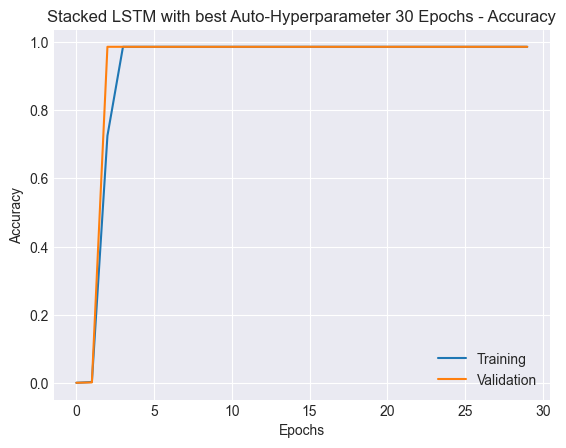

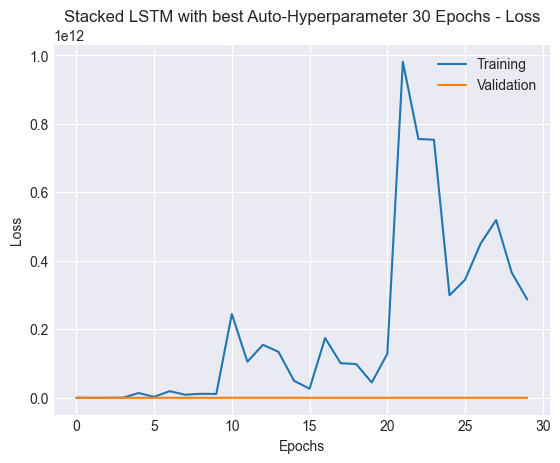

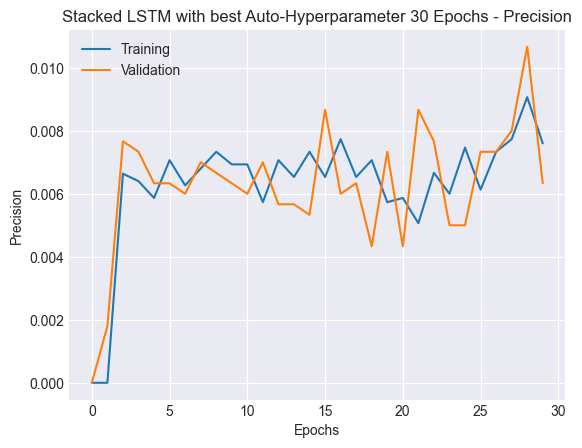

141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9867 - f1_score: 0.0021 - loss: 21640574.0000 - precision: 0.0041


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 10)         │       500,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 25, 80)         │        29,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 165)            │       162,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 165)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        24,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,149,203 (8.20 MB)

 Trainable params: 716,400 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,432,803 (5.47 MB)

<Figure size 640x480 with 0 Axes>

In [35]:
# single lstm model with tuned hyperparamter
hp_stacked_model_30 = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                    lstm_units1=80,
                                                    lstm_units2=165,
                                                    rate1=0.5,
                                                    rate2=0.5,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.00489866406915217,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_stacked_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                                 x_val=x_val,
                                                 y_val=y_val,
                                                 path=stacked_lstm_path,
                                                 model=hp_stacked_model_30,
                                                 batch_size=48,
                                                 epochs=30,
                                                 filename="hp_48Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_30,
                title="Stacked LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_30_evaluate = hp_stacked_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

# summary of the stacked model
hp_stacked_model_30.summary()

##### For 50 Epochs

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.0000e+00 - f1_score: 0.0033 - loss: 5.0190 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0016 - val_loss: 4.9760 - val_precision: 0.0000e+00
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.0000e+00 - f1_score: 0.0059 - loss: 4.9076 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0025 - val_loss: 4.6364 - val_precision: 0.0000e+00
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 4.6322e-05 - f1_score: 0.0106 - loss: 4.5170 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0064 - val_loss: 4.2877 - val_precision: 0.0000e+00
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.5135 - f1_score: 0.0084 - loss: 90527480.0000 - precision: 0.0329 - val_accuracy: 0.9867 - val_f1_score: 0.0031 - val_loss: 471771.5312 - val_precision: 0.0053
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9868 - f1_sc

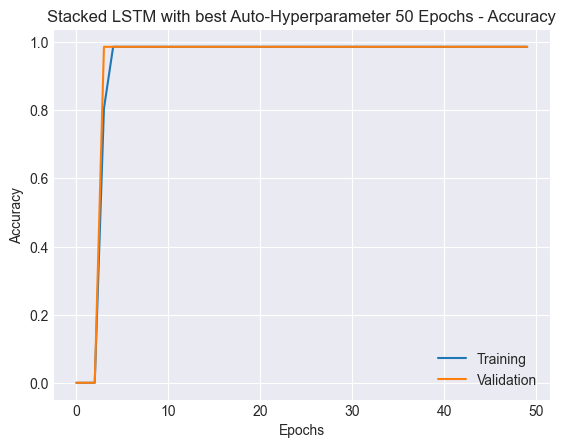

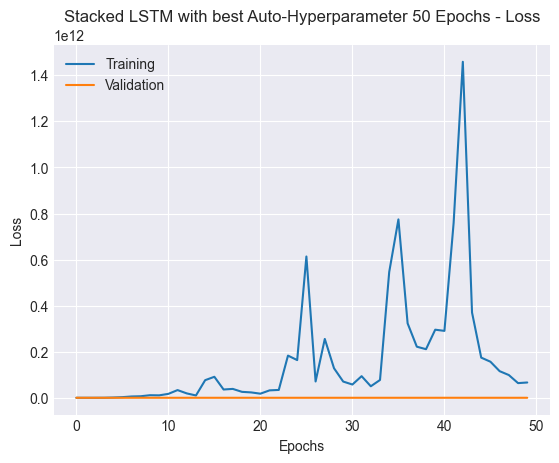

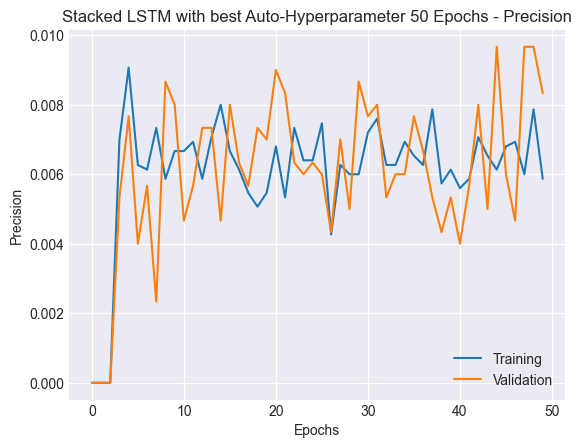

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9868 - f1_score: 0.0038 - loss: 7093980.5000 - precision: 0.0104


<Figure size 640x480 with 0 Axes>

In [36]:
# single lstm model with tuned hyperparamter
hp_stacked_model_50 = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                    lstm_units1=80,
                                                    lstm_units2=165,
                                                    rate1=0.5,
                                                    rate2=0.5,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.00489866406915217,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_stacked_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                                 x_val=x_val,
                                                 y_val=y_val,
                                                 path=stacked_lstm_path,
                                                 model=hp_stacked_model_50,
                                                 batch_size=48,
                                                 epochs=50,
                                                 filename="hp_48Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_50,
                title="Stacked LSTM with best Auto-Hyperparameter 50 Epochs",
                path=os.path.join(valuation_path, "Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_50_evaluate = hp_stacked_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

### Training the Stacked LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9868 - f1_score: 0.0064 - loss: 346081918976.0000 - precision: 0.0081 - val_accuracy: 0.9867 - val_f1_score: 0.0047 - val_loss: 24457034.0000 - val_precision: 0.0060
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.9868 - f1_score: 0.0057 - loss: 726615785472.0000 - precision: 0.0068 - val_accuracy: 0.9867 - val_f1_score: 0.0024 - val_loss: 39386332.0000 - val_precision: 0.0037
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9868 - f1_score: 0.0051 - loss: 956849979392.0000 - precision: 0.0071 - val_accuracy: 0.9867 - val_f1_score: 0.0032 - val_loss: 31241896.0000 - val_precision: 0.0050
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.9868 - f1_score: 0.0061 - loss: 797024059392.0000 - precision: 0.0072 - val_accuracy: 0.9867 - val_f1_score: 0.0036 - val_loss: 35382140.0000 - val_precision: 0.0050
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9867 -

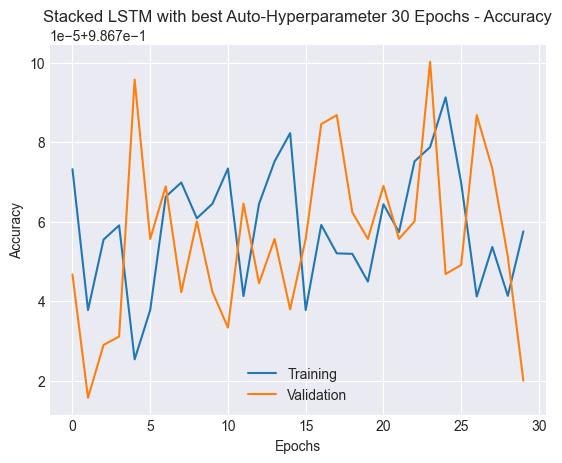

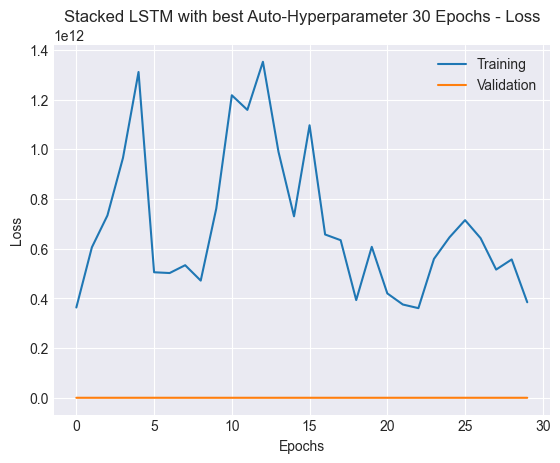

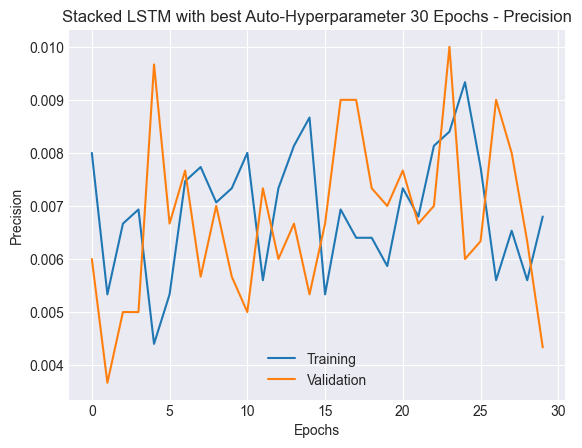

141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0000e+00 - f1_score: 4.4982e-04 - loss: 5.0014 - precision: 0.0000e+00


<Figure size 640x480 with 0 Axes>

In [37]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_30 = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                        lstm_units1=110,
                                                        lstm_units2=140,
                                                        rate1=0.525,
                                                        rate2=0.325,
                                                        activation="selu",
                                                        optimizer="Nadam",
                                                        lr=0.00956634035983909,
                                                        num_class=preprocess.num_intent,
                                                        vocab_size=VOCAB_SIZE,
                                                        textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                                     x_val=x_val,
                                                     y_val=y_val,
                                                     path=stacked_lstm_path,
                                                     model=hp_stacked_model_30,
                                                     batch_size=176,
                                                     epochs=30,
                                                     filename="old_hp_176Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_30,
                title="Stacked LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Old"))

# evaluating the model with test dataset
old_hp_stacked_model_30_evaluate = old_hp_stacked_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 50 Epochs

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.9868 - f1_score: 0.0065 - loss: 60903936000.0000 - precision: 0.0082 - val_accuracy: 0.9868 - val_f1_score: 0.0053 - val_loss: 7420816.5000 - val_precision: 0.0077
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.9868 - f1_score: 0.0068 - loss: 66252603392.0000 - precision: 0.0074 - val_accuracy: 0.9867 - val_f1_score: 0.0031 - val_loss: 5855059.5000 - val_precision: 0.0033
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.9868 - f1_score: 0.0071 - loss: 69262286848.0000 - precision: 0.0082 - val_accuracy: 0.9867 - val_f1_score: 0.0016 - val_loss: 6442143.5000 - val_precision: 0.0047
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.9868 - f1_score: 0.0053 - loss: 991552405504.0000 - precision: 0.0064 - val_accuracy: 0.9867 - val_f1_score: 0.0020 - val_loss: 5987105.5000 - val_precision: 0.0037
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9867 - f1_sco

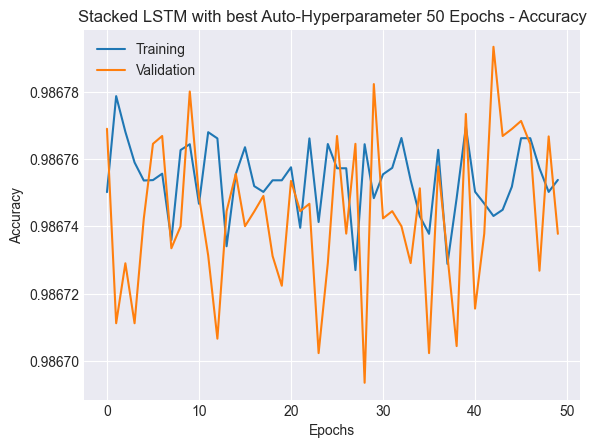

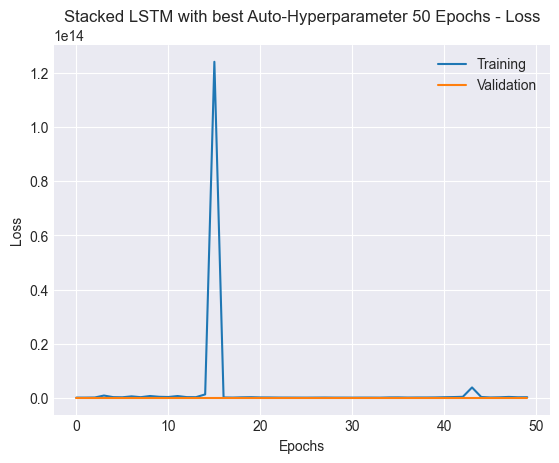

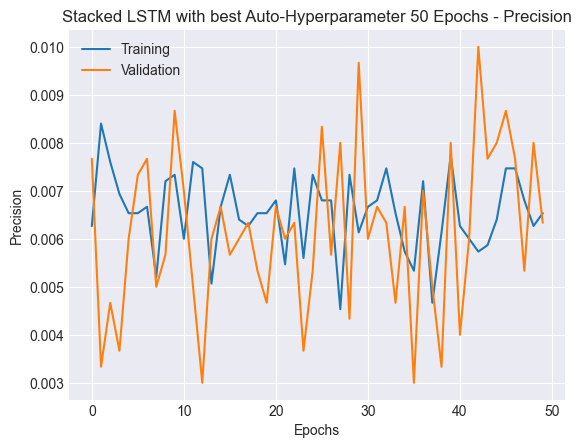

141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0000e+00 - f1_score: 1.0475e-04 - loss: 5.0092 - precision: 0.0000e+00


<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_50 = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                        lstm_units1=110,
                                                        lstm_units2=140,
                                                        rate1=0.525,
                                                        rate2=0.325,
                                                        activation="selu",
                                                        optimizer="Nadam",
                                                        lr=0.00956634035983909,
                                                        num_class=preprocess.num_intent,
                                                        vocab_size=VOCAB_SIZE,
                                                        textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                                     x_val=x_val,
                                                     y_val=y_val,
                                                     path=stacked_lstm_path,
                                                     model=hp_stacked_model_50,
                                                     batch_size=176,
                                                     epochs=50,
                                                     filename="old_hp_176Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_50,
                title="Stacked LSTM with best Auto-Hyperparameter 50 Epochs",
                path=os.path.join(valuation_path, "Old"))

# evaluating the model with test dataset
old_hp_stacked_model_50_evaluate = old_hp_stacked_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

### Training the Convo-LSTM Model with best Auto-Hyperparameter

In [39]:
# convo lstm path for
convo_lstm_path = os.path.join(hp_path, "Convo_lstm")

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.6916 - f1_score: 0.0059 - loss: 33667460.0000 - precision: 0.0061 - val_accuracy: 0.9866 - val_f1_score: 0.0021 - val_loss: 110859.1719 - val_precision: 0.0083
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.9867 - f1_score: 0.0059 - loss: 4418117.5000 - precision: 0.0068 - val_accuracy: 0.9866 - val_f1_score: 0.0013 - val_loss: 163715.6406 - val_precision: 0.0053
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.9866 - f1_score: 0.0050 - loss: 17358388.0000 - precision: 0.0063 - val_accuracy: 0.9867 - val_f1_score: 0.0027 - val_loss: 225168.0000 - val_precision: 0.0093
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9865 - f1_score: 0.0042 - loss: 1186574.3750 - precision: 0.0056 - val_accuracy: 0.9863 - val_f1_score: 0.0055 - val_loss: 24257.1113 - val_precision: 0.0067
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9865 - f1_score: 0.0051 - loss: 1

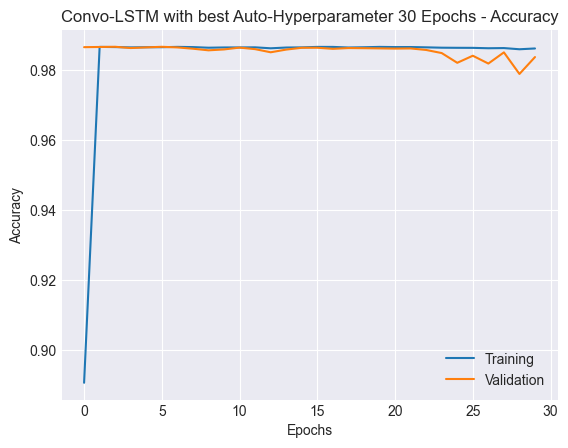

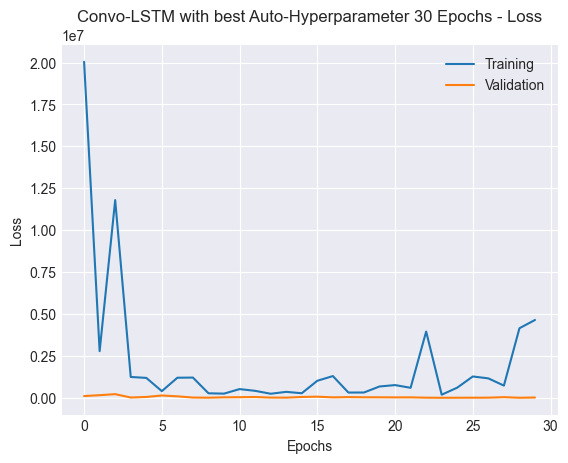

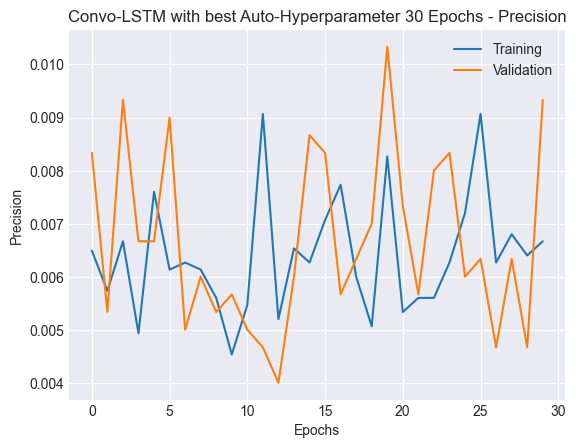

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9829 - f1_score: 0.0046 - loss: 23511.1523 - precision: 0.0128


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 25)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 25, 70)         │     3,500,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 25, 352)        │       148,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 352)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 135)            │       263,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 135)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │        20,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,864,506 (30.00 MB)

 Trainable params: 3,932,252 (15.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,932,254 (15.00 MB)

<Figure size 640x480 with 0 Axes>

In [40]:
# convo lstm model with tuned hyperparamter
hp_convo_model_30 = train_lstm.convo_lstm_model(embedding_seq_length=70,
                                                convo_filters=352,
                                                convo_rate=0.275,
                                                kernel_size=6,
                                                convo_activation="elu",
                                                lstm_units=135,
                                                lstm_rate=0.2,
                                                lstm_activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.018327591765327517,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_convo_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                               x_val=x_val,
                                               y_val=y_val,
                                               path=convo_lstm_path,
                                               model=hp_convo_model_30,
                                               batch_size=240,
                                               epochs=30,
                                               filename="hp_240Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_convo_history_30,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Convo_LSTM"))

# evaluating the model with test dataset
hp_convo_model_30_evaluate = hp_convo_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

# model summary
hp_convo_model_30.summary()

### Training the Convo-LSTM Model with Last best Sets of Auto-Hyperparameter 

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.5763 - f1_score: 0.0036 - loss: 70365120.0000 - precision: 0.0035 - val_accuracy: 0.9864 - val_f1_score: 0.0047 - val_loss: 24863.5469 - val_precision: 0.0093
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9867 - f1_score: 0.0061 - loss: 114426448.0000 - precision: 0.0067 - val_accuracy: 0.9852 - val_f1_score: 0.0045 - val_loss: 9601.5088 - val_precision: 0.0060
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9868 - f1_score: 0.0064 - loss: 229085536.0000 - precision: 0.0070 - val_accuracy: 0.9865 - val_f1_score: 0.0061 - val_loss: 34788.0703 - val_precision: 0.0083
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9868 - f1_score: 0.0065 - loss: 576273472.0000 - precision: 0.0076 - val_accuracy: 0.9866 - val_f1_score: 0.0042 - val_loss: 120022.7812 - val_precision: 0.0060
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9868 - f1_score: 0.00

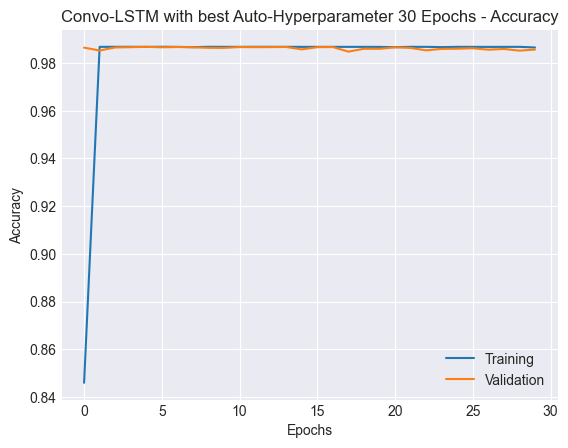

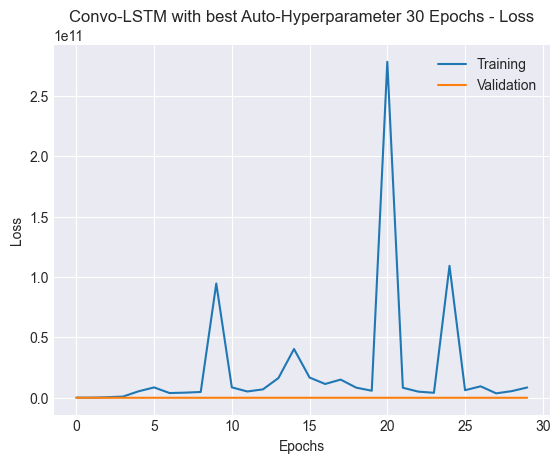

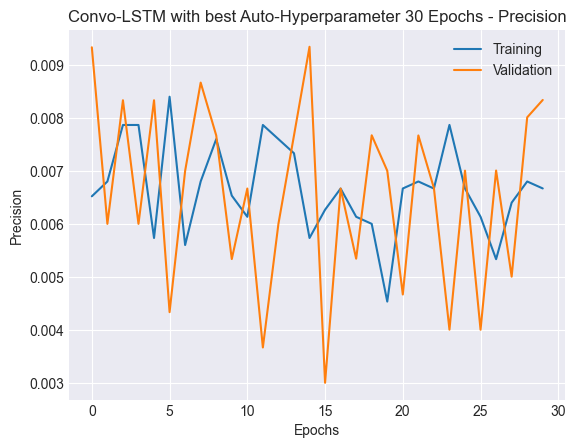

141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9848 - f1_score: 0.0034 - loss: 194545.7812 - precision: 0.0050


<Figure size 640x480 with 0 Axes>

In [41]:
# convo lstm model with tuned hyperparamter
old_hp_convo_model_30 = train_lstm.convo_lstm_model(embedding_seq_length=150,
                                                    convo_filters=320,
                                                    convo_rate=0.675,
                                                    kernel_size=3,
                                                    convo_activation="elu",
                                                    lstm_units=145,
                                                    lstm_rate=0.5,
                                                    lstm_activation="elu",
                                                    optimizer="Adam",
                                                    lr=0.009372089740136636,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_convo_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                                   x_val=x_val,
                                                   y_val=y_val,
                                                   path=convo_lstm_path,
                                                   model=old_hp_convo_model_30,
                                                   batch_size=16,
                                                   epochs=30,
                                                   filename="old_hp_16Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=old_hp_convo_history_30,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs",
                path=os.path.join(valuation_path, "Old"))

# evaluating the model with test dataset
old_hp_convo_model_30_evaluate = old_hp_convo_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

### Training the Single LSTM Model with different Hyperparameter

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.0000e+00 - f1_score: 0.0010 - loss: 5.0036 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 3.3767e-04 - val_loss: 4.7661 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.0000e+00 - f1_score: 0.0015 - loss: 4.7413 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0011 - val_loss: 4.6414 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.0000e+00 - f1_score: 0.0018 - loss: 4.5832 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 5.5805e-04 - val_loss: 4.5742 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.0000e+00 - f1_score: 0.0032 - loss: 4.4891 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0049 - val_loss: 4.4600 - val_precision: 0.0000e+00
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.

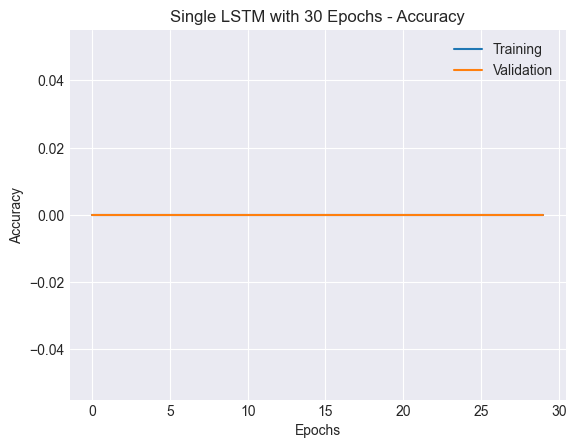

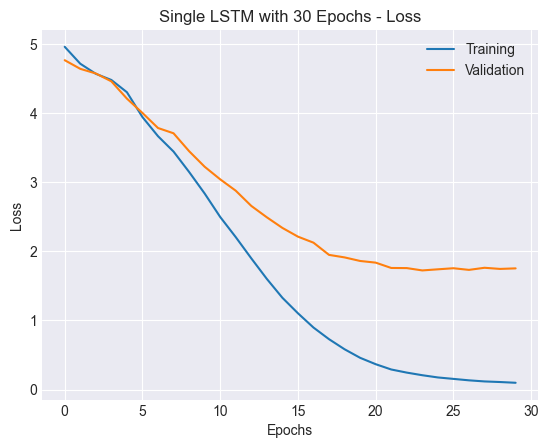

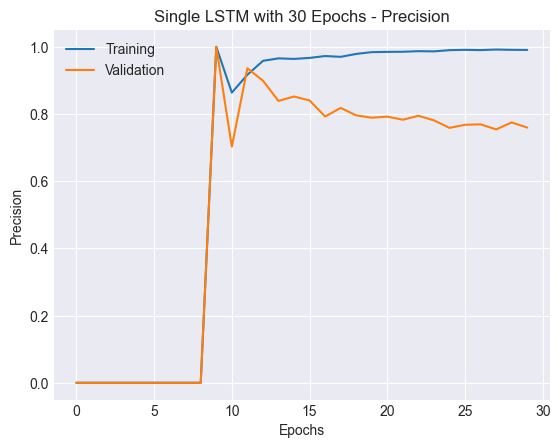

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - f1_score: 0.3639 - loss: 1.7239 - precision: 0.7645


<Figure size 640x480 with 0 Axes>

In [42]:
# single lstm model with tuned hyperparamter
lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=120,
                                             lstm_units=100,
                                             rate=0.2,
                                             activation="tanh",
                                             optimizer="Adam",
                                             lr=0.001,
                                             num_class=preprocess.num_intent,
                                             vocab_size=VOCAB_SIZE,
                                             textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                           x_val=x_val,
                                           y_val=y_val,
                                           path=single_lstm_path,
                                           model=lstm_model_30,
                                           batch_size=64,
                                           epochs=30,
                                           filename="single_64Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=lstm_history_30,
                title="Single LSTM with 30 Epochs",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_30_evaluate = lstm_model_30.evaluate(x=x_test,
                                                y=y_test,
                                                verbose=1)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.0000e+00 - f1_score: 0.0026 - loss: 5.0122 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0015 - val_loss: 5.0082 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 1.0688e-05 - f1_score: 0.0050 - loss: 4.9274 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0131 - val_loss: 4.3094 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 5.9382e-06 - f1_score: 0.0286 - loss: 4.1206 - precision: 0.3022 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0722 - val_loss: 3.6789 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.0000e+00 - f1_score: 0.0966 - loss: 3.4055 - precision: 0.3333 - val_accuracy: 0.0000e+00 - val_f1_score: 0.2046 - val_loss: 3.0768 - val_precision: 1.0000
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.0000e+00 - f1_scor

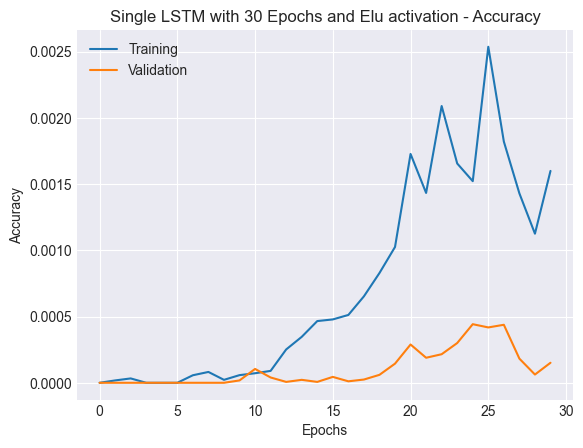

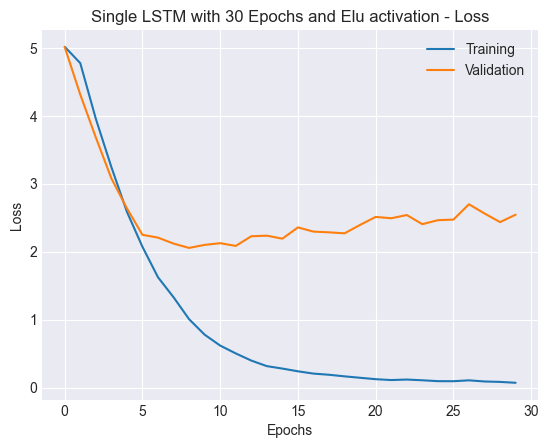

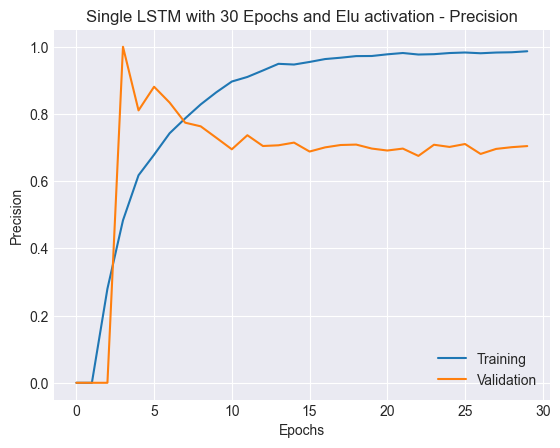

141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 4.9813e-04 - f1_score: 0.3402 - loss: 2.5623 - precision: 0.6865


<Figure size 640x480 with 0 Axes>

In [44]:
# single lstm model with hyperparamter
lstm_model_30_elu = train_lstm.single_lstm_model(embedding_seq_length=120,
                                                 lstm_units=100,
                                                 rate=0.2,
                                                 activation="elu",
                                                 optimizer="Adam",
                                                 lr=0.001,
                                                 num_class=preprocess.num_intent,
                                                 vocab_size=VOCAB_SIZE,
                                                 textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_30_elu = train_lstm.model_history(x=x_train, y=y_train,
                                               x_val=x_val,
                                               y_val=y_val,
                                               path=single_lstm_path,
                                               model=lstm_model_30_elu,
                                               batch_size=64,
                                               epochs=30,
                                               filename="64Batch_30epochs_elu")
# plottiing the mertics
train_lstm.plot(history=lstm_history_30_elu,
                title="Single LSTM with 30 Epochs and Elu activation",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_30_elu_eluevaluate = lstm_model_30_elu.evaluate(
    x=x_test, y=y_test, verbose=1)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.0000e+00 - f1_score: 0.0015 - loss: 5.0114 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0060 - val_loss: 4.9960 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.0000e+00 - f1_score: 0.0070 - loss: 4.8402 - precision: 0.2008 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0169 - val_loss: 4.4420 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.0000e+00 - f1_score: 0.0159 - loss: 4.3578 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0461 - val_loss: 4.0941 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.0000e+00 - f1_score: 0.0317 - loss: 4.0264 - precision: 0.2100 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0706 - val_loss: 3.8470 - val_precision: 0.0000e+00
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.0000e+00 - f1_sc

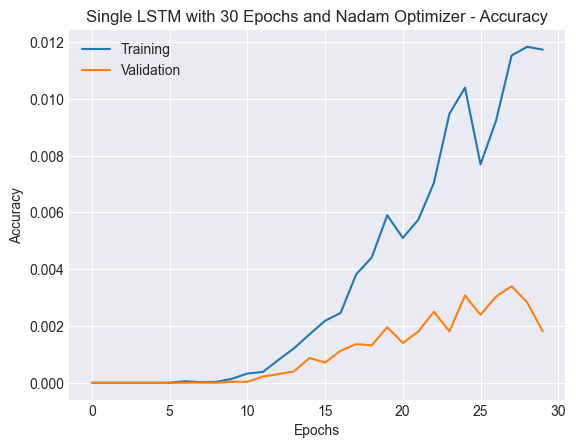

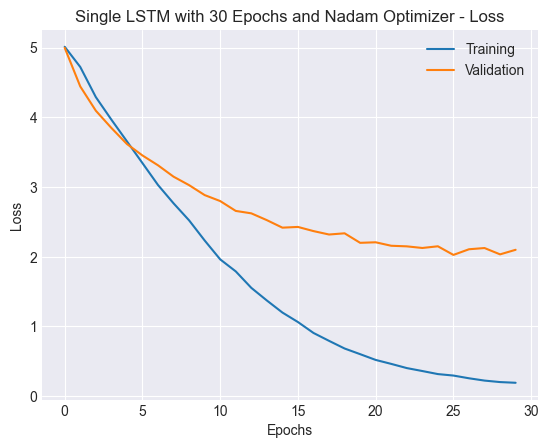

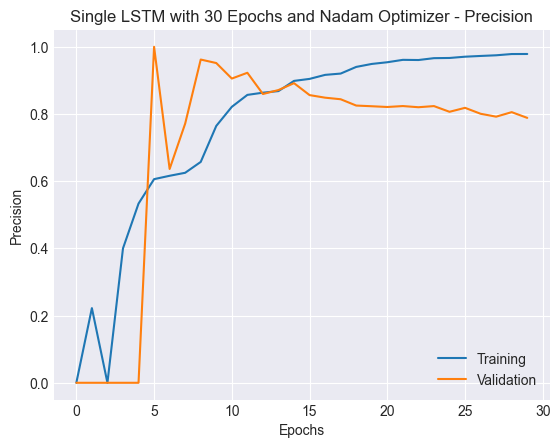

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0013 - f1_score: 0.3468 - loss: 2.1912 - precision: 0.7796


<Figure size 640x480 with 0 Axes>

In [29]:
# single lstm model with hyperparamter
lstm_model_30_nadam = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                   lstm_units=30,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="Nadam",
                                                   lr=0.001,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_30_nadam = train_lstm.model_history(x=x_train, y=y_train,
                                                 x_val=x_val,
                                                 y_val=y_val,
                                                 path=single_lstm_path,
                                                 model=lstm_model_30_nadam,
                                                 batch_size=64,
                                                 epochs=30,
                                                 filename="64Batch_30epochs_Nadam")
# plottiing the mertics
train_lstm.plot(history=lstm_history_30_nadam,
                title="Single LSTM with 30 Epochs and Nadam Optimizer",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_30_nadam_eluevaluate = lstm_model_30_nadam.evaluate(
    x=x_test, y=y_test, verbose=1)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.0000e+00 - f1_score: 0.0021 - loss: 5.0119 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0014 - val_loss: 5.0061 - val_precision: 0.0000e+00
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.0036 - loss: 4.8910 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0045 - val_loss: 4.5311 - val_precision: 0.0000e+00
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.0092 - loss: 4.4920 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0205 - val_loss: 4.2112 - val_precision: 0.0000e+00
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.0199 - loss: 4.1629 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0287 - val_loss: 3.9747 - val_precision: 0.0000e+00
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.0000e+00

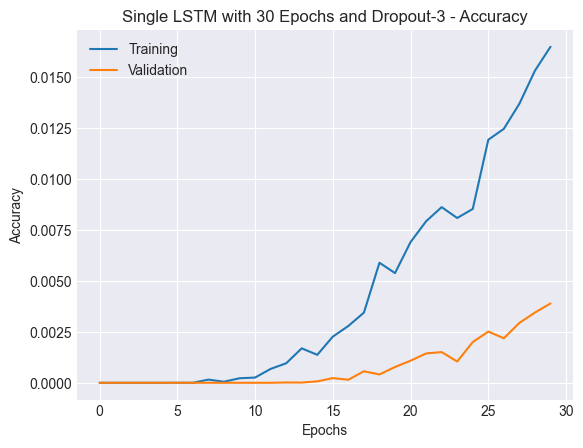

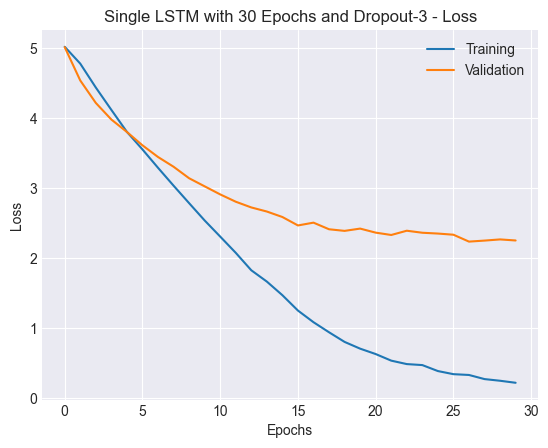

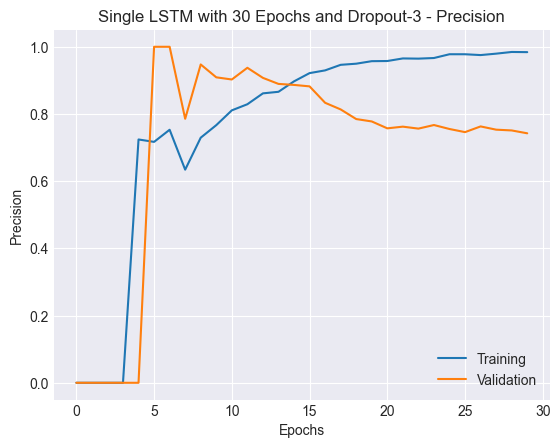

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0045 - f1_score: 0.3227 - loss: 2.2891 - precision: 0.7450


<Figure size 640x480 with 0 Axes>

In [30]:
# single lstm model with hyperparamter
lstm_model_rate = train_lstm.single_lstm_model(embedding_seq_length=110,
                                               lstm_units=30,
                                               rate=0.3,
                                               activation="elu",
                                               optimizer="Nadam",
                                               lr=0.001,
                                               num_class=preprocess.num_intent,
                                               vocab_size=VOCAB_SIZE,
                                               textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
lstm_history_rate = train_lstm.model_history(x=x_train, y=y_train,
                                             x_val=x_val,
                                             y_val=y_val,
                                             path=single_lstm_path,
                                             model=lstm_model_rate,
                                             batch_size=64,
                                             epochs=30,
                                             filename="64Batch_30epochs_rate3")
# plottiing the mertics
train_lstm.plot(history=lstm_history_rate,
                title="Single LSTM with 30 Epochs and Dropout-3",
                path=os.path.join(valuation_path, "Single_LSTM"))

# evaluating the model with test dataset
lstm_model_rate_eluevaluate = lstm_model_rate.evaluate(
    x=x_test, y=y_test, verbose=1)

### Augmenting Data

##### Using Easy Data Augmentation(EDA)

In [ ]:
# combining the training and validation data for augmentation
original_data = pd.concat(
    [preprocess.train_df, preprocess.val_df], ignore_index=True)

In [ ]:
# augmenting data using EDA methods
augment_eda = eda.augment_data(data=original_data,


                               augment_sizes=[1, 2, 3, 4, 5, 10])
augment_eda.augment()

[INFO] Augmenting data of size 1...
	 Augmented.
[INFO] Saving the augmented data to disk...
	 Saved.

[INFO] Augmenting data of size 2...
	 Augmented.
[INFO] Saving the augmented data to disk...
	 Saved.

[INFO] Augmenting data of size 3...
	 Augmented.
[INFO] Saving the augmented data to disk...
	 Saved.

[INFO] Augmenting data of size 4...
	 Augmented.
[INFO] Saving the augmented data to disk...
	 Saved.

[INFO] Augmenting data of size 5...
	 Augmented.
[INFO] Saving the augmented data to disk...
	 Saved.

[INFO] Augmenting data of size 10...
	 Augmented.
[INFO] Saving the augmented data to disk...
	 Saved.



##### Back Translation

In [18]:
# augmenting data using back translation methods
back_translation_agument = back_translation.back_translate(data=original_data)
back_translation_agument.augment()

[INFO] Augmenting data using language hi ...
	 Augmented and saved to the disk.
[INFO] Augmenting data using language fr ...
	 Augmented and saved to the disk.
[INFO] Augmenting data using language de ...
	 Augmented and saved to the disk.
[INFO] Augmenting data using language es ...
	 Augmented and saved to the disk.
